<a href="https://colab.research.google.com/github/rajat1911996sharma/Credit-Card-Fraud-Detection/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv('creditcard.csv')

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.describe()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
df.shape

(284807, 31)

In [ ]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0dabc275f8>,
      dtype=object)

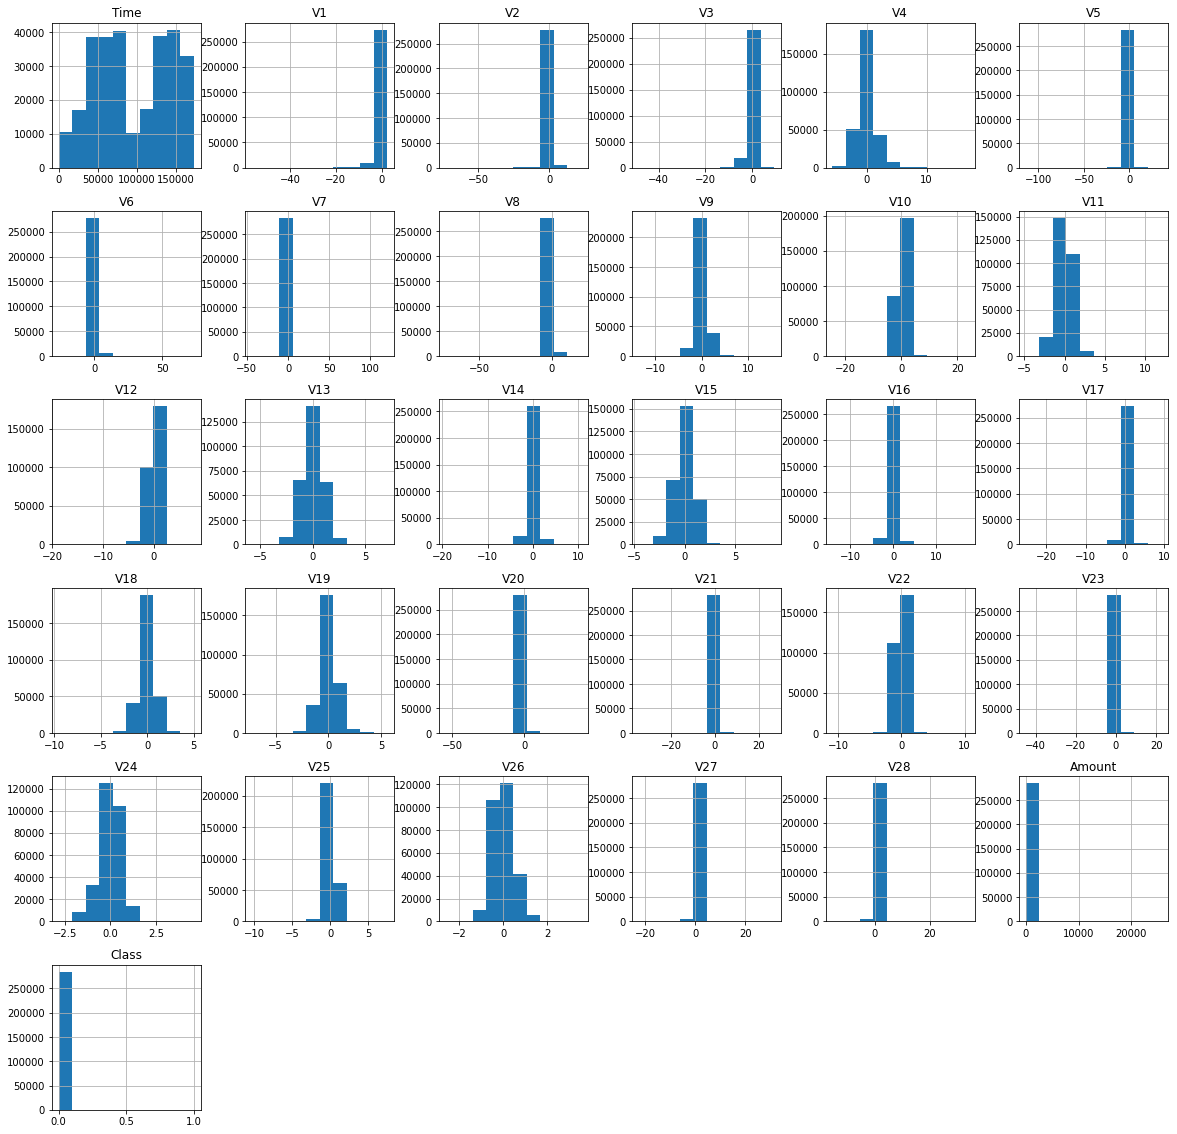

In [ ]:
df.hist(figsize=(20,20))

In [ ]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

Here, we can clearly see that we have an unbalaced dataset.
The Fraud data is 1

In [ ]:
#Determine the number of fraud cases in dataset
fraud = df[df['Class']==1]
valid = df[df['Class']==0]

In [ ]:
outlier_fraction = len(fraud)/float(len(valid))
outlier_fraction

0.0017304750013189597

It is harder predict and we might predict more fraud than the catual cases

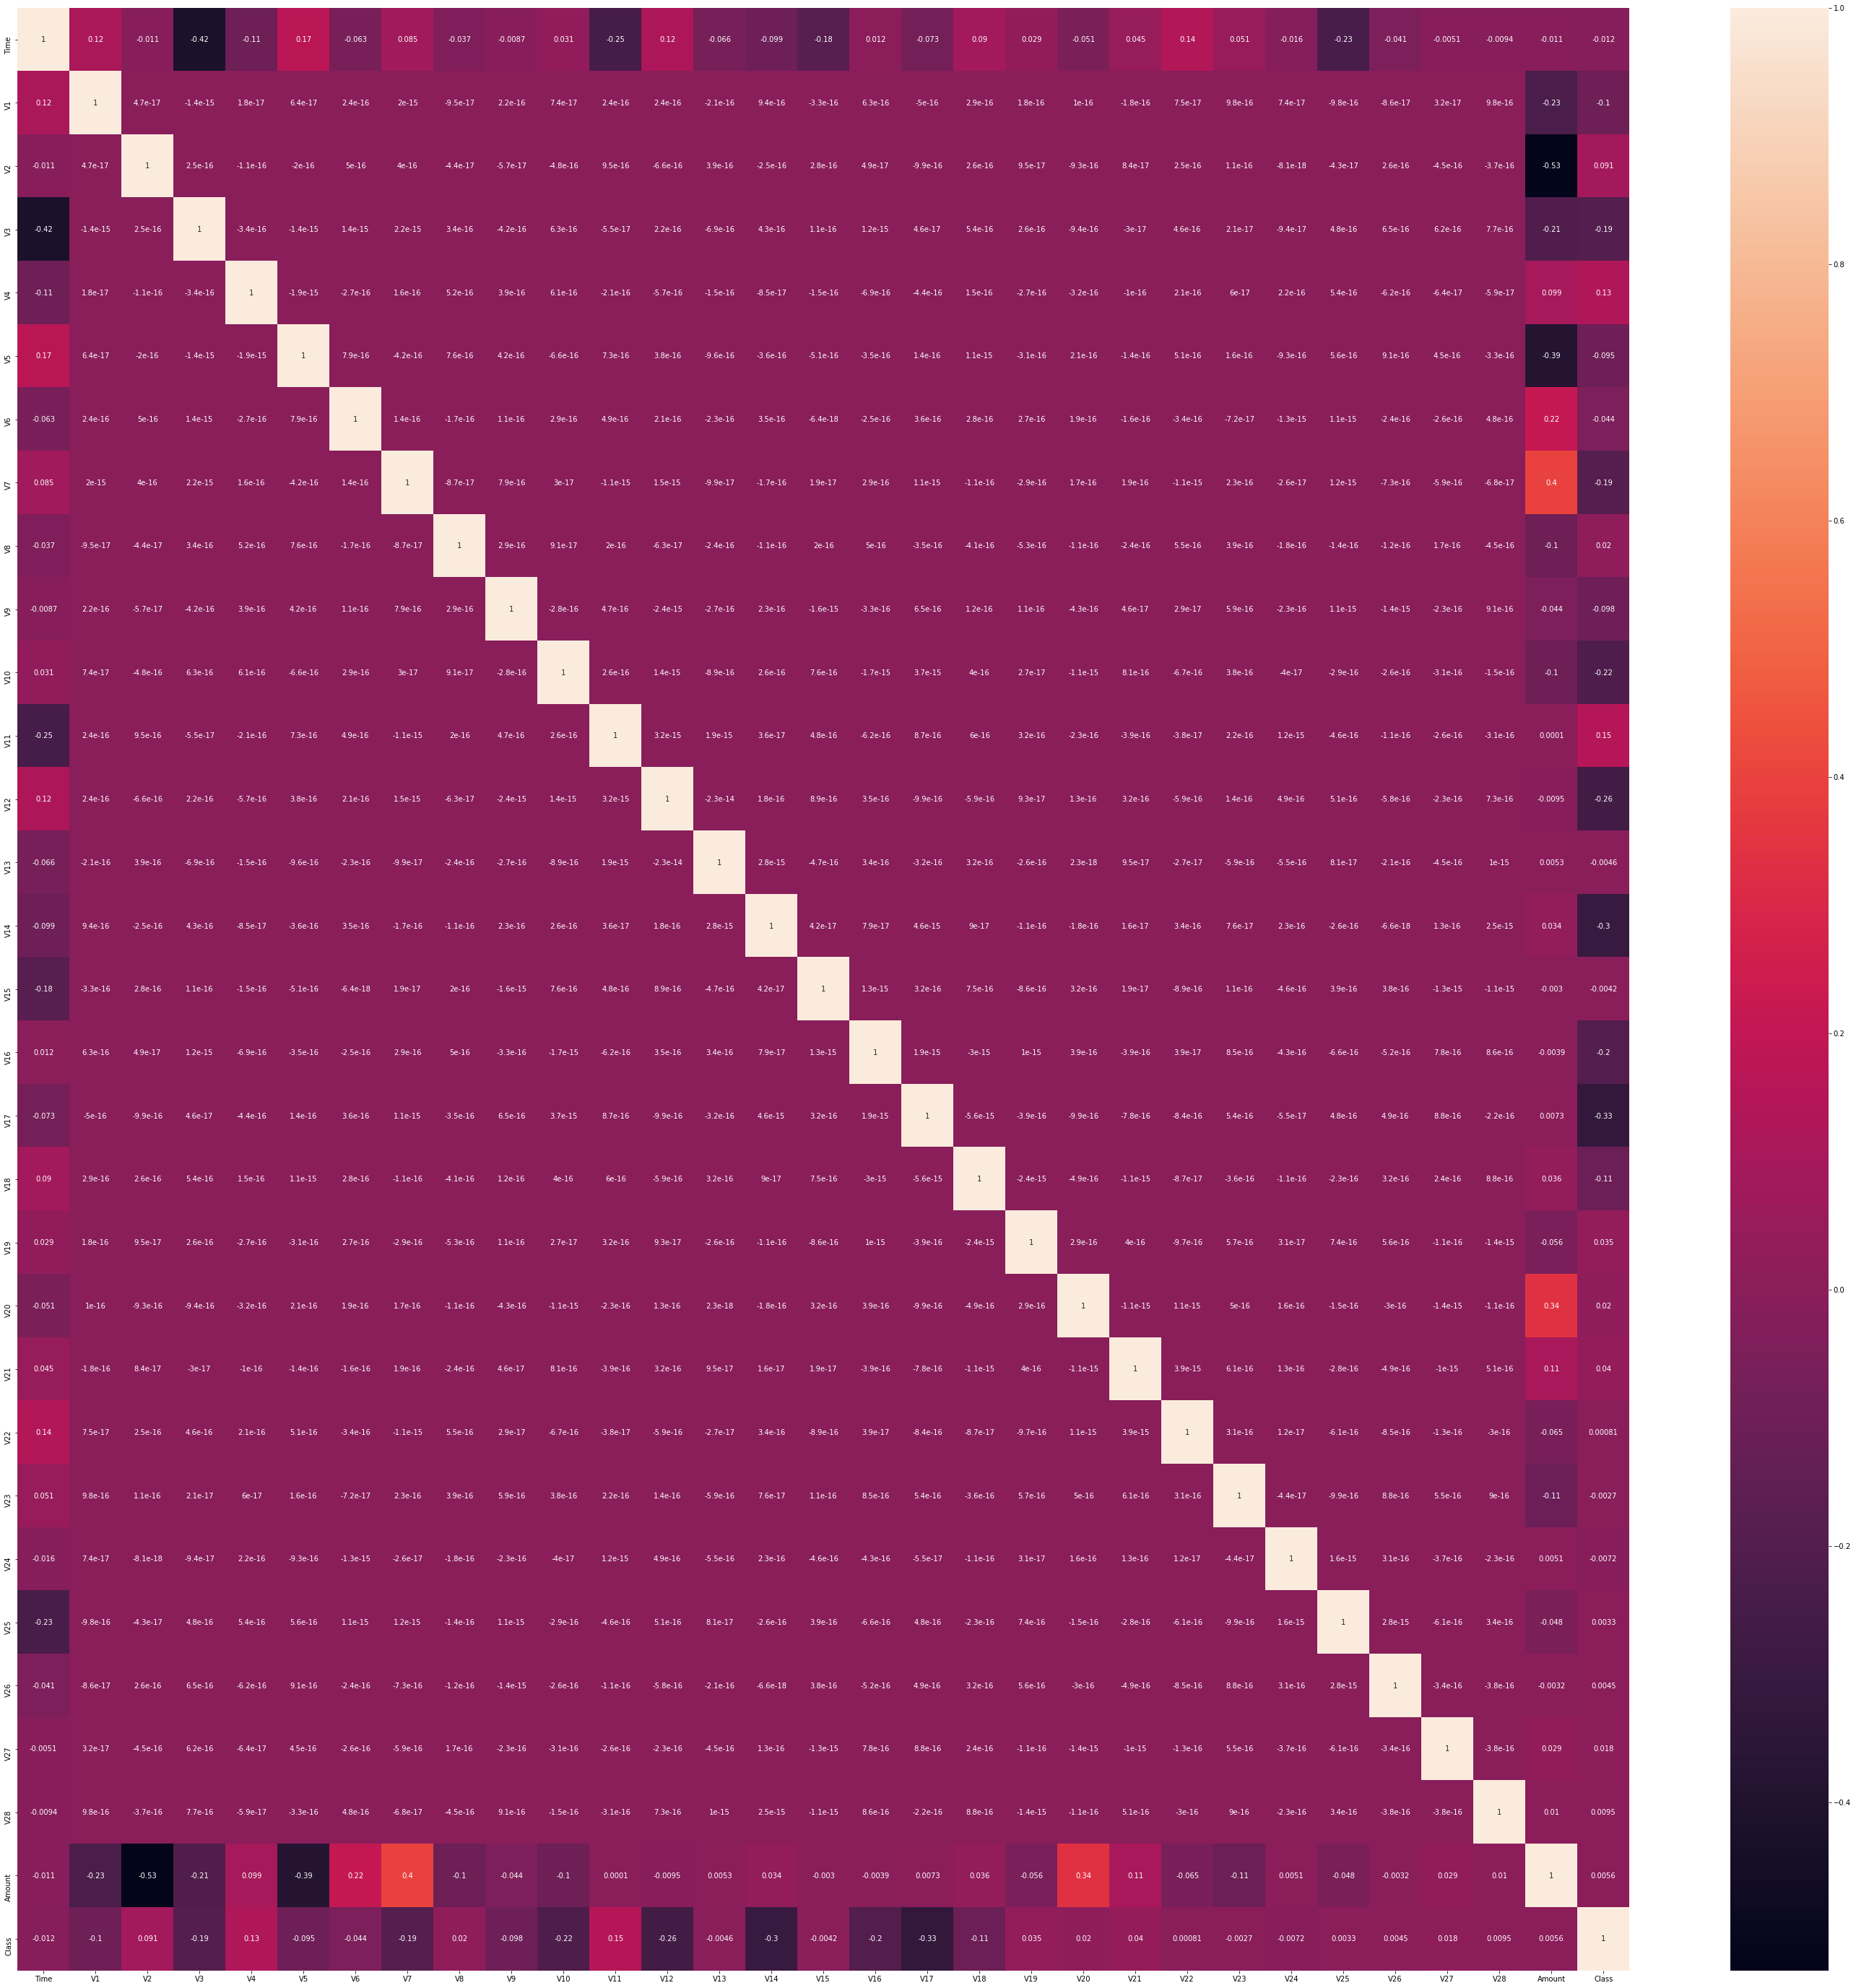

In [ ]:
plt.figure(figsize=(50,50))
sns.heatmap(df.corr(),annot=True)

In [ ]:
import plotly.express as px
px.imshow(df.corr())

We have unbalanced set so we will use a library imblearn for under sampling

imbalanced learn imblearn


In [ ]:
X = df.drop('Class',axis=1)
y=df['Class']

In [ ]:
from imblearn.under_sampling import NearMiss

In [ ]:
#Implementing Undersmapling for Handling Imbalanced dataset
nm = NearMiss(random_state=101)
X_res,y_res=nm.fit_sample(X,y)
print(X_res.shape,y_res.shape)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



(984, 30) (984,)


Now, the sets are more balanced

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_res,y_res,random_state=101,test_size=0.3)

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lm = LogisticRegression()

In [ ]:
lm.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
pred_lm = lm.predict(X_test)


Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier()

In [ ]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
pred_rfc = rfc.predict(X_test)

Classification with Neural Networks

AttributeError: ignored

In [ ]:
X = df.drop('Class',axis=1).values
y=df['Class'].values

In [ ]:
nm = NearMiss(random_state=101)
X_res,y_res=nm.fit_sample(X,y)
print(X_res.shape,y_res.shape)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



(984, 30) (984,)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',patience=25)

In [ ]:
model = Sequential()

In [ ]:
model.add(Dense(30,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(15,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='relu'))

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam')

In [ ]:
model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          batch_size=512,epochs=600,
          verbose=1,
          callbacks=[early_stop])

Epoch 1/600
2/2 [==============================] - 0s 64ms/step - loss: 4.6342 - val_loss: 2.9486
Epoch 2/600
2/2 [==============================] - 0s 9ms/step - loss: 4.4286 - val_loss: 1.9245
Epoch 3/600
2/2 [==============================] - 0s 8ms/step - loss: 4.0780 - val_loss: 1.3595
Epoch 4/600
2/2 [==============================] - 0s 9ms/step - loss: 3.6409 - val_loss: 1.1111
Epoch 5/600
2/2 [==============================] - 0s 9ms/step - loss: 3.6642 - val_loss: 1.0319
Epoch 6/600
2/2 [==============================] - 0s 11ms/step - loss: 3.3334 - val_loss: 0.9878
Epoch 7/600
2/2 [==============================] - 0s 10ms/step - loss: 3.1119 - val_loss: 0.9620
Epoch 8/600
2/2 [==============================] - 0s 10ms/step - loss: 3.2167 - val_loss: 0.9435
Epoch 9/600
2/2 [==============================] - 0s 9ms/step - loss: 2.8964 - val_loss: 0.9277
Epoch 10/600
2/2 [==============================] - 0s 9ms/step - loss: 2.4361 - val_loss: 0.8694
Epoch 11/600
2/2 [=======

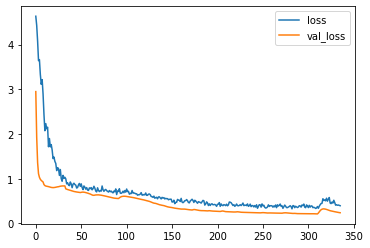

In [ ]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [ ]:
pred_nn = model.predict_classes(X_test)

Comparing Predictions for these models

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print('Logictic Model Prediction')
print(classification_report(y_test,pred_lm))
print(confusion_matrix(y_test,pred_lm))
print('\n')

print('Random Forest Classifier Prediction')
print(classification_report(y_test,pred_rfc))
print(confusion_matrix(y_test,pred_rfc))
print('\n')

print('Neural Network Classifier Prediction')
print(classification_report(y_test,pred_nn))
print(confusion_matrix(y_test,pred_nn))
print('\n')

Logictic Model Prediction
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       147
           1       0.97      0.95      0.96       149

    accuracy                           0.96       296
   macro avg       0.96      0.96      0.96       296
weighted avg       0.96      0.96      0.96       296

[[142   5]
 [  8 141]]


Random Forest Classifier Prediction
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       147
           1       0.97      0.94      0.96       149

    accuracy                           0.96       296
   macro avg       0.96      0.96      0.96       296
weighted avg       0.96      0.96      0.96       296

[[143   4]
 [  9 140]]


Neural Network Classifier Prediction
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       147
           1       0.99      0.85      0.91       149

    accuracy                     

In [ ]:
import random
random.seed(101)
rand_ind = random.randint(0,len(df))

In [ ]:
new_CC_entry = df.drop('Class',axis=1).iloc[rand_ind]
new_CC_entry

Time      68055.000000
V1           -2.341132
V2            1.751088
V3           -0.452317
V4           -0.442809
V5           -0.169355
V6           -0.017201
V7            0.952337
V8           -0.106737
V9            0.355656
V10           0.880656
V11          -1.698037
V12          -0.477286
V13           0.022547
V14           0.122474
V15           0.860036
V16           0.556876
V17          -0.764820
V18          -0.285627
V19           0.749488
V20          -0.354977
V21          -0.459054
V22          -1.510139
V23          -0.061406
V24          -1.056909
V25          -0.617967
V26          -0.252417
V27          -0.966673
V28           0.333292
Amount      118.520000
Name: 102107, dtype: float64

In [ ]:
model.predict_classes(new_CC_entry.values.reshape(1,30))

array([[1]], dtype=int32)

In [ ]:
lm.predict(new_CC_entry.values.reshape(1,30))

array([0])

In [ ]:
rfc.predict(new_CC_entry.values.reshape(1,30))

array([1])

In [ ]:
df.iloc[rand_ind]['Class']

0.0

As, seen from our Classification Report and Confusion Matrix.
The Logistic Regression outperforms the other two algorithms